In [8]:
import shap
from chessplainer.wrapper import EngineWrapper, ChessExplainer
import chess
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

In [9]:
FIT_LIMIT_KWARGS = dict(time=5)
PREDICT_LIMIT_KWARGS = dict(time=0.1)
COLORS = {
            "square light": "#ffffff",
            "square dark": "#aaaaaa",
            "margin": "#000000",
        }

In [10]:
# you can obtain the FEN using an online board editor https://lichess.org/editor
FEN = "7k/7p/8/8/3p4/2n5/6RK/7Q w - - 0 1"

White to move


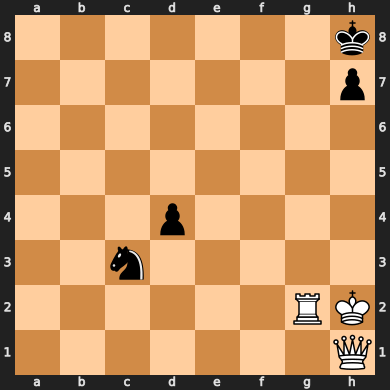

In [11]:
board = chess.Board(FEN)
print("White to move" if board.turn else "Black to move")
board

In [12]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.KernelExplainer,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.999 0.001]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 286 ms, sys: 31.3 ms, total: 318 ms
Wall time: 2.62 s


.values =
array([[[ 0.48043333, -0.48043333],
        [ 0.25551667, -0.25551667],
        [-0.13331667,  0.13331667],
        [-0.05473333,  0.05473333],
        [-0.0489    ,  0.0489    ]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1.]])

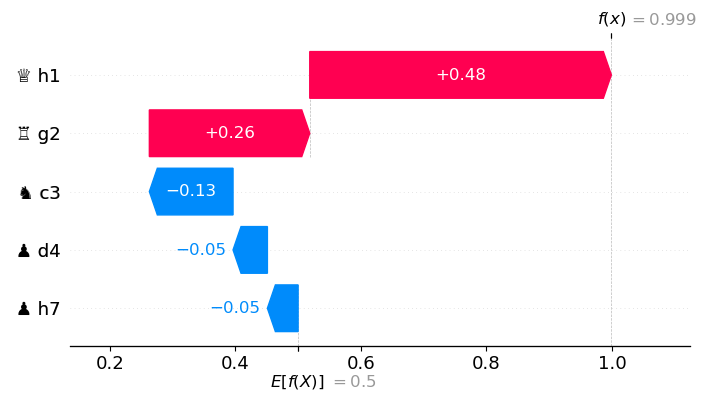

In [13]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]
fig = plt.gcf()
plt.gca().set_yticklabels(clean_labels)
plt.grid(False)
plt.show()


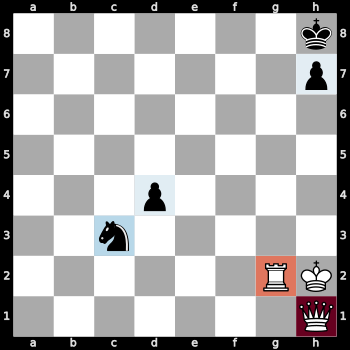

In [14]:
chesshap.to_svg(colors=COLORS)